# Adapter courbes et données

Il y a de nombreux problèmes qui se ressemblent beaucoup lorsqu'il s'agit d'essayer de faire passer des fonctions (ou des courbes) par ou autour d'un ensemble de points de données. Ce sont les problèmes d'interpolation, d'extrapolation, et de régression. On donne ici un survol de ces trois notions, pour aider à y voir plus clair dans la panoplie de méthodes disponibles. Pour simplifier, on ne considère que le cas à deux dimensions, où l'on a un jeu de données venant par couple $\left(x_{i}, y_{i}\right)$ représentant les coordonnées de points dans le [plan cartésien](https://fr.wikipedia.org/wiki/Coordonn%C3%A9es_cart%C3%A9siennes).

In [1]:
import matplotlib.pyplot as plt
import random as r
from math import pi, sin

## Interpolation versus régression

Si les données peuvent représenter une fonction, c'est-à-dire si l'on a un ensemble de $n+1$ données $x_{i}$ avec toujours $y_{i} \neq y_{j}$ si et seulement si $x_{i}\neq x_{j}$ (on peut aller d'un point à un autre en allant toujours de gauche à droite, sans faire demi tour et en passant par tous les points), alors on peut utiliser une méthode d'interpolation. En effet, dans le cas d'une interpolation, on cherche à relier _tous les points donnés_ par une fonction inconnue.

En revanche, s'il est impossible de faire passer une fonction simple par l'ensemble des données, on peut essayer de passer _au plus près_ de l'ensemble des points, sans chercher à passer _par_ l'ensemble des points. On parle alors de régression.

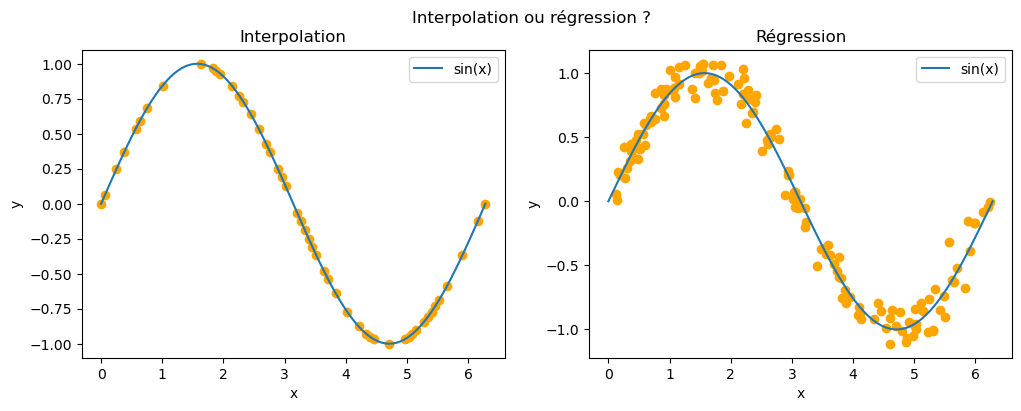

<Figure size 640x480 with 0 Axes>

In [2]:
x_true = [2*pi*_/100 for _ in range(101)]
y_true = [sin(x) for x in x_true]
x_interpolation = [x for x in x_true]
r.shuffle(x_interpolation)
x_interpolation = x_interpolation[:50]
x_interpolation.sort()
y_interpolation = [sin(x) for x in x_interpolation]
x_regression = [r.uniform(0, 2*pi) for _ in range(150)]
y_regression = [sin(x) + 0.1*r.gauss(mu=0.0, sigma=1.0)
                for x in x_regression]


fig, axs = plt.subplots(1,2, figsize=(12,4))

ax = axs[0]
ax.scatter(x_interpolation, y_interpolation, c='orange')
ax.plot(x_true, y_true, label="sin(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Interpolation")
ax.legend()
ax = axs[1]
ax.scatter(x_regression, y_regression, c='orange')
ax.plot(x_true, y_true, label="sin(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Régression")
ax.legend()

fig.suptitle("Interpolation ou régression ?")
plt.show()
plt.clf()

### Interpolation globale ou par morceaux

On distingue encore plusieurs cas d'interpolation : 

 - l'interpolation globale, où on cherche à faire passer une seule fonction par l'ensemble des points : souvent la fonction rechercéhe est un polynôme
 - l'interpolation locale, où on cherche à faire passer une fonction plus simple par un sous-ensemble de points, et à recouvrir tous les points donnés par un ensemble de fonctions différentes

Par exemple, si on a $n+1$ points, on peut tenter de faire passer un polynôme d'ordre $n+1$ par l'ensemble de ces points dans le cas de l'interpolation globale (on parle alors d'[interpolation polynomiale](interpolation)). 

On peut aussi faire passer $n$ polynômes de degrés faibles par morceaux : sur l'intervale $\left[x_{0}, x_{1}\right]$ on choisit un polynôme $p_{1} = a_{1}x + b_{1}$, sur l'intervale $\left[x_{1}, x_{2}\right]$ on  calcule les coefficients $a_{2}$ et $b_{2}$ de la droite $p_{2} = a_{2}x + b_{2}$, ... On a choisit ici l'exemple d'une interpolation linéaire par morceaux. On peut prendre le cas de polynôme de plus haut degrés, comme par exemple des splines. Dans la méthode des splines (dites cubiques naturelles) on cherche à construire les polynômes d'ordre trois $p_{1} = a_{1}x^{3} + b_{1}x^{2} + c_{1} x + d_{1}$ sur l'intervale $\left[x_{0}, x_{1}\right]$, $p_{2} = \cdots$ sur l'intervale suivant, ... En réalité on choisit l'ordre du polynôme qui correspond le mieux au problème, et surtout aux conditions de continuité des fonctions recherchées.

## Interpolation versus extrapolation

La différence est ici simple : on parle d'interpolation lorsque l'on cherche à trouver les valeurs d'une fonction entre deux points de données connus, on parle d'extrapolation lorsque l'on cherche à trouver les valeurs de la fonction à l'extérieur des points de données. 

Dans le cas de la régression, on est toujours en train de passer à côté des données, donc la différence n'existe pas. On parle plutôt de prédiction lorsque, une fois les paramètres de la fonction de régression obtenus, on calcule des valeurs de la fonction en dehors du domaine naturel des données mesurées.